In [436]:
import tensorflow as tf
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from keras.utils import np_utils
from sklearn.svm import SVR

In [437]:
data = pd.read_csv('ENB2012_data.csv')

In [438]:
X = data.iloc[:,:-2]
YHeat = data.iloc[:,-2]
YCool = data.iloc[:,-1]

In [439]:
# Test and Train Split for heating and cooling load 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_H_train,Y_H_test = train_test_split(X,YHeat,test_size = 0.2,random_state = 1)
Y_C_train,Y_C_test = train_test_split(YCool,test_size = 0.2,random_state = 1)

In [440]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test) 

# Base Regression

# Linear Regresssor

In [333]:
# Heating load Linear regression Moddel and with ada boost, bagging and pasting ensemble 
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import mean_squared_error
from math import sqrt

linreg_regr_H = LinearRegression()
fitted = linreg_regr_H.fit(X_train,Y_H_train)
y_pred_linreg_H = fitted.predict(X_test)
print('Training Score {:.8f}'.format(fitted.score(X_train,Y_H_train)))
print('Test Score {:.8f}'.format(fitted.score(X_test,Y_H_test)))
rmse_linreg_H = sqrt(mean_squared_error(Y_H_test, y_pred_linreg_H))

# pasting
pas_clf_lr = BaggingRegressor(LinearRegression(),bootstrap=False, n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
pas_clf_lr.fit(X_train, Y_H_train)
print('Accuracy of Training after Pasting: {:.2f}'.format(pas_clf_lr.score(X_train, Y_H_train)))
print('Accuracy of Test after Pasting: {:.2f}'.format(pas_clf_lr.score(X_test, Y_H_test)))

# bagging
bag_clf_lr = BaggingRegressor(LinearRegression(),bootstrap=True, n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_lr.fit(X_train, Y_H_train)
print('Accuracy of Training after Bagging: {:.2f}'.format(bag_clf_lr.score(X_train, Y_H_train)))
print('Accuracy of Test after Bagging: {:.2f}'.format(bag_clf_lr.score(X_test, Y_H_test)))

# boosting
ada_clf_lr = AdaBoostRegressor(LinearRegression(),n_estimators=200, learning_rate=0.04, random_state=1)
ada_clf_lr.fit(X_train, Y_H_train)
print('Accuracy of Training after ada boost: {:.2f}'.format(ada_clf_lr.score(X_train, Y_H_train)))
print('Accuracy of Test after ada boost: {:.2f}'.format(ada_clf_lr.score(X_test, Y_H_test)))

Training Score 0.92025293
Test Score 0.89902278
Accuracy of Training after Pasting: 0.92
Accuracy of Test after Pasting: 0.90
Accuracy of Training after Bagging: 0.92
Accuracy of Test after Bagging: 0.90
Accuracy of Training after ada boost: 0.92
Accuracy of Test after ada boost: 0.90


In [334]:
#Cooling load Linaer regression Moddel and with ada boost ensemble
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

linreg_regr_C = LinearRegression()
fitted = linreg_regr_C.fit(X_train,Y_C_train)
y_pred_linreg_C = fitted.predict(X_test)
print('Training Score {:.8f}'.format(fitted.score(X_train,Y_C_train)))
print('Test Score {:.8f}'.format(fitted.score(X_test,Y_C_test)))
rmse_linreg_H = sqrt(mean_squared_error(Y_C_test, y_pred_linreg_C))

# pasting
pas_clf_dt = BaggingRegressor(LinearRegression(),bootstrap=False, n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
pas_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after Pasting: {:.2f}'.format(pas_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of Test after Pasting: {:.2f}'.format(pas_clf_dt.score(X_test, Y_C_test)))

# bagging
bag_clf_dt = BaggingRegressor(LinearRegression(),bootstrap=True, n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after Bagging: {:.2f}'.format(bag_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of Test after Bagging: {:.2f}'.format(bag_clf_dt.score(X_test, Y_C_test)))

# boosting
ada_clf_dt = AdaBoostRegressor(LinearRegression(),n_estimators=200, learning_rate=0.04, random_state=1)
ada_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after ada boost: {:.2f}'.format(ada_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of test after ada boost: {:.2f}'.format(ada_clf_dt.score(X_test, Y_C_test)))


Training Score 0.89532803
Test Score 0.85653170
Accuracy of Training after Pasting: 0.90
Accuracy of Test after Pasting: 0.86
Accuracy of Training after Bagging: 0.90
Accuracy of Test after Bagging: 0.86
Accuracy of Training after ada boost: 0.89
Accuracy of test after ada boost: 0.85


# Ridge Regression

In [335]:
# Heating load  basic ridge regression Moddel and with ada boost, bagging and pasting ensemble 
from sklearn.linear_model import Ridge
ridge_regr = Ridge()
ridge_regr.fit(X_train,Y_H_train)
print('Training Score {:.8f}'.format(ridge_regr.score(X_train,Y_H_train)))
print('Test Score {:.8f}'.format(ridge_regr.score(X_test,Y_H_test)))

from sklearn.model_selection import GridSearchCV
ridge_cv = Ridge()
param_grid = {'alpha': [0.01,1,5,10,100,2000]}
grid_search = GridSearchCV(ridge_cv,param_grid,cv=5)
grid_search.fit(X_train,Y_H_train)
              
y_pred_ridge = grid_search.predict(X_test)
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.8f}'.format(grid_search.best_score_))  
rmse_ridge = sqrt(mean_squared_error(Y_H_test,y_pred_ridge))

# pasting
pas_clf_dt = BaggingRegressor(Ridge(),bootstrap=False, n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
pas_clf_dt.fit(X_train, Y_H_train)
print('Accuracy of Training after Pasting: {:.2f}'.format(pas_clf_dt.score(X_train, Y_H_train)))
print('Accuracy of Test after Pasting: {:.2f}'.format(pas_clf_dt.score(X_test, Y_H_test)))

# bagging
bag_clf_dt = BaggingRegressor(Ridge(),bootstrap=True, n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_dt.fit(X_train, Y_H_train)
print('Accuracy of Training after Bagging: {:.2f}'.format(bag_clf_dt.score(X_train, Y_H_train)))
print('Accuracy of Test after Bagging: {:.2f}'.format(bag_clf_dt.score(X_test, Y_H_test)))

# boosting
ada_clf_dt = AdaBoostRegressor(Ridge(),n_estimators=200, learning_rate=0.04, random_state=1)
ada_clf_dt.fit(X_train, Y_H_train)
print('Accuracy of Training after ada boost: {:.2f}'.format(ada_clf_dt.score(X_train, Y_H_train)))
print('Accuracy of Test after ada boost: {:.2f}'.format(ada_clf_dt.score(X_test, Y_H_test)))


Training Score 0.91827732
Test Score 0.89639346
Best parameters{'alpha': 0.01}
Best score 0.91802632
Accuracy of Training after Pasting: 0.91
Accuracy of Test after Pasting: 0.89
Accuracy of Training after Bagging: 0.91
Accuracy of Test after Bagging: 0.89
Accuracy of Training after ada boost: 0.92
Accuracy of Test after ada boost: 0.90


In [290]:
#Cooling load Ridge regression Moddel and with ada boost, bagging and pasting ensemble
from sklearn.linear_model import Lasso
lasso_regr = Ridge(max_iter = 100000)
lasso_regr.fit(X_train,Y_C_train)
print('Training Score {:.8f}'.format(lasso_regr.score(X_train,Y_C_train)))
print('Test Score {:.8f}'.format(lasso_regr.score(X_test,Y_C_test)))


from sklearn.model_selection import GridSearchCV
lasso_cv = Ridge(max_iter = 100000)
param_grid = {'alpha':[1,5,10,20,100,2000]}
grid_search_ls = GridSearchCV(lasso_cv,param_grid,cv = 5)
grid_search_ls.fit(X_train,Y_C_train)  
y_pred_lasso = grid_search_ls.predict(X_test)              
print('Best parameters{}'.format(grid_search_ls.best_params_))
print('Best Score {:.8f}'.format(grid_search_ls.best_score_))
rmse_lasso = sqrt(mean_squared_error(Y_C_test,y_pred_lasso))

# pasting
pas_clf_dt = BaggingRegressor(Ridge(),bootstrap=False, n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
pas_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after Pasting: {:.2f}'.format(pas_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of Test after Pasting: {:.2f}'.format(pas_clf_dt.score(X_test, Y_C_test)))

# bagging
bag_clf_dt = BaggingRegressor(Ridge(),bootstrap=True, n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after Bagging: {:.2f}'.format(bag_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of Test after Bagging: {:.2f}'.format(bag_clf_dt.score(X_test, Y_C_test)))

# boosting
ada_clf_dt = AdaBoostRegressor(Ridge(),n_estimators=200, learning_rate=0.04, random_state=1)
ada_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after ada boost: {:.2f}'.format(ada_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of test after ada boost: {:.2f}'.format(ada_clf_dt.score(X_test, Y_C_test)))

Training Score 0.89249860
Test Score 0.85435787
Best parameters{'alpha': 1}
Best Score 0.88912015
Accuracy of Training after Pasting: 0.88
Accuracy of Test after Pasting: 0.85
Accuracy of Training after Bagging: 0.88
Accuracy of Test after Bagging: 0.84
Accuracy of Training after ada boost: 0.89
Accuracy of test after ada boost: 0.85


# Lasso

In [336]:
# Heating load  basic Lasso regression Moddel and with ada boost, bagging and pasting ensemble 
from sklearn.linear_model import Ridge
ridge_regr = Lasso()
ridge_regr.fit(X_train,Y_H_train)
print('Training Score {:.8f}'.format(ridge_regr.score(X_train,Y_H_train)))
print('Test Score {:.8f}'.format(ridge_regr.score(X_test,Y_H_test)))

from sklearn.model_selection import GridSearchCV
ridge_cv = Lasso()
param_grid = {'alpha': [0.01,1,5,10,100,2000]}
grid_search = GridSearchCV(ridge_cv,param_grid,cv=5)
grid_search.fit(X_train,Y_H_train)
              
y_pred_ridge = grid_search.predict(X_test)
print('Best parameters{}'.format(grid_search.best_params_))
print('Best score {:.8f}'.format(grid_search.best_score_))  
rmse_ridge = sqrt(mean_squared_error(Y_H_test,y_pred_ridge))

# pasting
pas_clf_dt = BaggingRegressor(Lasso(),bootstrap=False, n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
pas_clf_dt.fit(X_train, Y_H_train)
print('Accuracy of Training after Pasting: {:.2f}'.format(pas_clf_dt.score(X_train, Y_H_train)))
print('Accuracy of Test after Pasting: {:.2f}'.format(pas_clf_dt.score(X_test, Y_H_test)))

# bagging
bag_clf_dt = BaggingRegressor(Lasso(),bootstrap=True, n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_dt.fit(X_train, Y_H_train)
print('Accuracy of Training after Bagging: {:.2f}'.format(bag_clf_dt.score(X_train, Y_H_train)))
print('Accuracy of Test after Bagging: {:.2f}'.format(bag_clf_dt.score(X_test, Y_H_test)))

# boosting
ada_clf_dt = AdaBoostRegressor(Lasso(),n_estimators=200, learning_rate=0.04, random_state=1)
ada_clf_dt.fit(X_train, Y_H_train)
print('Accuracy of Training after ada boost: {:.2f}'.format(ada_clf_dt.score(X_train, Y_H_train)))
print('Accuracy of Test after ada boost: {:.2f}'.format(ada_clf_dt.score(X_test, Y_H_test)))


Training Score 0.75728001
Test Score 0.73278192
Best parameters{'alpha': 0.01}
Best score 0.91628202
Accuracy of Training after Pasting: 0.76
Accuracy of Test after Pasting: 0.74
Accuracy of Training after Bagging: 0.76
Accuracy of Test after Bagging: 0.73
Accuracy of Training after ada boost: 0.82
Accuracy of Test after ada boost: 0.80


In [337]:
#Cooling load Lasso regression Moddel and with ada boost, bagging and pasting ensemble
from sklearn.linear_model import Lasso
lasso_regr = Lasso(max_iter = 100000)
lasso_regr.fit(X_train,Y_C_train)
print('Training Score {:.8f}'.format(lasso_regr.score(X_train,Y_C_train)))
print('Test Score {:.8f}'.format(lasso_regr.score(X_test,Y_C_test)))


from sklearn.model_selection import GridSearchCV
lasso_cv = Lasso(max_iter = 100000)
param_grid = {'alpha':[1,5,10,20,100,2000]}
grid_search_ls = GridSearchCV(lasso_cv,param_grid,cv = 5)
grid_search_ls.fit(X_train,Y_C_train)  
y_pred_lasso = grid_search_ls.predict(X_test)              
print('Best parameters{}'.format(grid_search_ls.best_params_))
print('Best Score {:.8f}'.format(grid_search_ls.best_score_))
rmse_lasso = sqrt(mean_squared_error(Y_C_test,y_pred_lasso))

# pasting
pas_clf_dt = BaggingRegressor(Lasso(),bootstrap=False, n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
pas_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after Pasting: {:.2f}'.format(pas_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of Test after Pasting: {:.2f}'.format(pas_clf_dt.score(X_test, Y_C_test)))

# bagging
bag_clf_dt = BaggingRegressor(Lasso(),bootstrap=True, n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after Bagging: {:.2f}'.format(bag_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of Test after Bagging: {:.2f}'.format(bag_clf_dt.score(X_test, Y_C_test)))

# boosting
ada_clf_dt = AdaBoostRegressor(Lasso(),n_estimators=200, learning_rate=0.04, random_state=1)
ada_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after ada boost: {:.2f}'.format(ada_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of test after ada boost: {:.2f}'.format(ada_clf_dt.score(X_test, Y_C_test)))

Training Score 0.76362541
Test Score 0.73028846
Best parameters{'alpha': 1}
Best Score 0.76161200
Accuracy of Training after Pasting: 0.76
Accuracy of Test after Pasting: 0.73
Accuracy of Training after Bagging: 0.76
Accuracy of Test after Bagging: 0.73
Accuracy of Training after ada boost: 0.79
Accuracy of test after ada boost: 0.76


# KNN Regressor 

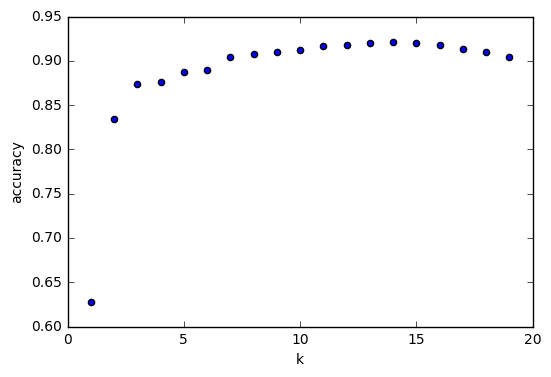

Training Score 0.94490797
Test Score 0.91247119
Accuracy of Training after Pasting: 0.90
Accuracy of Test after Pasting: 0.88
Accuracy of Training after Bagging: 0.90
Accuracy of Test after Bagging: 0.88
Accuracy of Training after ada boost: 0.95
Accuracy of test after ada boost: 0.91


In [320]:
# KNN reressor For heating load with ada boost ensemble
from sklearn.neighbors import KNeighborsRegressor

import matplotlib.pyplot as plt
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, Y_H_train)
    scores.append(knn.score(X_test, Y_H_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);
plt.show()

knn_regr = KNeighborsRegressor(n_neighbors = 10).fit(X_train,Y_H_train)
y_pred_knn_H = knn_regr.predict(X_test)
print('Training Score {:.8f}'.format(knn_regr.score(X_train,Y_H_train)))
print('Test Score {:.8f}'.format(knn_regr.score(X_test,Y_H_test)))

# pasting
pas_clf_dt = BaggingRegressor(KNeighborsRegressor(n_neighbors = 10),bootstrap=False, n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
pas_clf_dt.fit(X_train, Y_H_train)
print('Accuracy of Training after Pasting: {:.2f}'.format(pas_clf_dt.score(X_train, Y_H_train)))
print('Accuracy of Test after Pasting: {:.2f}'.format(pas_clf_dt.score(X_test, Y_H_test)))

# bagging
bag_clf_dt = BaggingRegressor(KNeighborsRegressor(n_neighbors = 10),bootstrap=True, n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_dt.fit(X_train, Y_H_train)
print('Accuracy of Training after Bagging: {:.2f}'.format(bag_clf_dt.score(X_train, Y_H_train)))
print('Accuracy of Test after Bagging: {:.2f}'.format(bag_clf_dt.score(X_test, Y_H_test)))

# boosting
ada_clf_dt = AdaBoostRegressor(KNeighborsRegressor(n_neighbors = 10),n_estimators=200, learning_rate=0.04, random_state=1)
ada_clf_dt.fit(X_train, Y_H_train)
print('Accuracy of Training after ada boost: {:.2f}'.format(ada_clf_dt.score(X_train, Y_H_train)))
print('Accuracy of test after ada boost: {:.2f}'.format(ada_clf_dt.score(X_test, Y_H_test)))

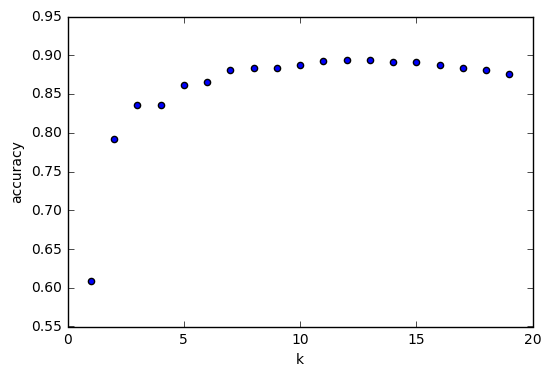

Training Score 0.92777868
Test Score 0.88747484
Accuracy of Training after Pasting: 0.88
Accuracy of Test after Pasting: 0.85
Accuracy of Training after Bagging: 0.88
Accuracy of Test after Bagging: 0.84
Accuracy of Training after ada boost: 0.94
Accuracy of test after ada boost: 0.90


In [272]:
# KNN regressor for cooling load with ada boost,pasting and bagging ensemble

import matplotlib.pyplot as plt
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsRegressor(n_neighbors = k)
    knn.fit(X_train, Y_C_train)
    scores.append(knn.score(X_test, Y_C_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);
plt.show()

knn_regr = KNeighborsRegressor(n_neighbors = 10).fit(X_train,Y_C_train)
y_pred_knn_C = knn_regr.predict(X_test)
print('Training Score {:.8f}'.format(knn_regr.score(X_train,Y_C_train)))
print('Test Score {:.8f}'.format(knn_regr.score(X_test,Y_C_test)))

# pasting
bag_clf_dt = BaggingRegressor(KNeighborsRegressor(n_neighbors = 10),bootstrap=False, n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after Pasting: {:.2f}'.format(bag_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of Test after Pasting: {:.2f}'.format(bag_clf_dt.score(X_test, Y_C_test)))

# bagging
bag_clf_dt = BaggingRegressor(KNeighborsRegressor(n_neighbors = 10),bootstrap=True, n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after Bagging: {:.2f}'.format(bag_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of Test after Bagging: {:.2f}'.format(bag_clf_dt.score(X_test, Y_C_test)))

#boosting
ada_clf_dt = AdaBoostRegressor(KNeighborsRegressor(n_neighbors = 10),n_estimators=200, learning_rate=0.04, random_state=1)
ada_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after ada boost: {:.2f}'.format(ada_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of test after ada boost: {:.2f}'.format(ada_clf_dt.score(X_test, Y_C_test)))

# Random Forest 

In [266]:
# For heating load with random forest ensemble with boosting 
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(max_depth = 50)
forest_model.fit(X_train, Y_H_train)
fm_preds_H = forest_model.predict(X_test)
print("R2 score from training set :"+str(forest_model.score(X_train,Y_H_train)))
print("R2 score from test set :"+str(forest_model.score(X_test,Y_H_test)))

#adaboost
ada_clf_dt = AdaBoostRegressor(RandomForestRegressor(max_depth = 50),n_estimators=200, learning_rate=0.04, random_state=1)
ada_clf_dt.fit(X_train, Y_H_train)
print('Accuracy of Training after ada boost: {:.2f}'.format(ada_clf_dt.score(X_train, Y_H_train)))
print('Accuracy of Test after ada boost: {:.2f}'.format(ada_clf_dt.score(X_test, Y_H_test)))

R2 score from training set :0.999508504733
R2 score from test set :0.997397269029
Accuracy of Training after ada boost: 1.00
Accuracy of Test after ada boost: 1.00


In [268]:
# For cooling load with random forest with boosting
from sklearn.ensemble import RandomForestRegressor
forest_model = RandomForestRegressor(max_depth = 50)
forest_model.fit(X_train, Y_C_train)
fm_preds_C = forest_model.predict(X_test)
print("R2 score from training set :"+str(forest_model.score(X_train,Y_C_train)))
print("R2 score from test set :"+str(forest_model.score(X_test,Y_C_test)))

#Adaboost
ada_clf_dt = AdaBoostRegressor(RandomForestRegressor(max_depth = 30),n_estimators=200, learning_rate=0.04, random_state=1)
ada_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after ada boost: {:.2f}'.format(ada_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of Test after ada boost: {:.2f}'.format(ada_clf_dt.score(X_test, Y_C_test)))


R2 score from training set :0.993205614404
R2 score from test set :0.954740615647
Accuracy of Training after ada boost: 1.00
Accuracy of Test after ada boost: 0.96


# SVR

In [253]:
# Heating Load with linear kernel 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
param_grid = {'C':[0.1,1,10,100],'epsilon':[0.01,0.1,1,10,]}
grid_search_svr = GridSearchCV(svr,param_grid,cv=10)              
grid_search_svr.fit(X_train,Y_H_train)
y_pred_svrlin_H = grid_search_svr.predict(X_test) 

print('Best params {}'.format(grid_search_svr.best_params_))
print('Best score {:.8f}'.format(grid_search_svr.best_score_))
print('Training Score {:.8f}'.format(grid_search_svr.score(X_train,Y_H_train)))
print('Test Score {:.8f}'.format(grid_search_svr.score(X_test,Y_H_test)))

# pasting
bag_clf_dt = BaggingRegressor(SVR(kernel = 'linear'),bootstrap=False,n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_dt.fit(X_train, Y_H_train)
print('Accuracy of Training after Pasting: {:.2f}'.format(bag_clf_dt.score(X_train, Y_H_train)))
print('Accuracy of Test after Pasting: {:.2f}'.format(bag_clf_dt.score(X_test, Y_H_test)))

# bagging
bag_clf_dt = BaggingRegressor(SVR(kernel = 'linear'),bootstrap=True,n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_dt.fit(X_train, Y_H_train)
print('Accuracy of Training after Bagging: {:.2f}'.format(bag_clf_dt.score(X_train, Y_H_train)))
print('Accuracy of Test after Bagging: {:.2f}'.format(bag_clf_dt.score(X_test, Y_H_test)))

#Adaboost
ada_clf_dt = AdaBoostRegressor(SVR(kernel = 'linear'),n_estimators=200, learning_rate=0.04, random_state=1)
ada_clf_dt.fit(X_train, Y_H_train)
print('Accuracy of Training after ada boost: {:.2f}'.format(ada_clf_dt.score(X_train, Y_H_train)))
print('Accuracy of Test after ada boost: {:.2f}'.format(ada_clf_dt.score(X_test, Y_H_test)))


Best params {'epsilon': 0.01, 'C': 100}
Best score 0.91541999
Training Score 0.91762542
Test Score 0.89837587
Accuracy of Training after Bagging: 0.87
Accuracy of Test after Bagging: 0.85
Accuracy of Training after ada boost: 0.92
Accuracy of Test after ada boost: 0.90


In [273]:
# Cooling Load with linear kernel 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr = SVR(kernel = 'linear')
param_grid = {'C':[0.1,1,10,100],'epsilon':[0.01,0.1,1,10,]}
grid_search_svr = GridSearchCV(svr,param_grid,cv=10)              
grid_search_svr.fit(X_train,Y_C_train)
y_pred_svrlin_H = grid_search_svr.predict(X_test) 

print('Best params {}'.format(grid_search_svr.best_params_))
print('Best score {:.8f}'.format(grid_search_svr.best_score_))
print('Training Score {:.8f}'.format(grid_search_svr.score(X_train,Y_C_train)))
print('Test Score {:.8f}'.format(grid_search_svr.score(X_test,Y_C_test)))

# pasting
bag_clf_dt = BaggingRegressor(SVR(kernel = 'linear'),bootstrap=False,n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after Pasting: {:.2f}'.format(bag_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of Test after Pasting: {:.2f}'.format(bag_clf_dt.score(X_test, Y_C_test)))

# bagging
bag_clf_dt = BaggingRegressor(SVR(kernel = 'linear'),bootstrap=True,n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after Bagging: {:.2f}'.format(bag_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of Test after Bagging: {:.2f}'.format(bag_clf_dt.score(X_test, Y_C_test)))

#Adaboost
ada_clf_dt = AdaBoostRegressor(SVR(kernel = 'linear'),n_estimators=200, learning_rate=0.04, random_state=1)
ada_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after ada boost: {:.2f}'.format(ada_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of Test after ada boost: {:.2f}'.format(ada_clf_dt.score(X_test, Y_C_test)))

Best params {'epsilon': 1, 'C': 10}
Best score 0.88833087
Training Score 0.89335518
Test Score 0.85639918
Accuracy of Training after Pasting: 0.85
Accuracy of Test after Pasting: 0.81
Accuracy of Training after Bagging: 0.85
Accuracy of Test after Bagging: 0.80
Accuracy of Training after ada boost: 0.89
Accuracy of Test after ada boost: 0.85


In [274]:
# Heating Load with rbf kernel 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
param_grid = {'C':[0.1,1,10,100],'epsilon':[0.01,0.1,1,10,]}
grid_search_svr = GridSearchCV(svr,param_grid,cv=10)              
grid_search_svr.fit(X_train,Y_H_train)
y_pred_svrlin_H = grid_search_svr.predict(X_test) 

print('Best params {}'.format(grid_search_svr.best_params_))
print('Best score {:.8f}'.format(grid_search_svr.best_score_))
print('Training Score {:.8f}'.format(grid_search_svr.score(X_train,Y_H_train)))
print('Test Score {:.8f}'.format(grid_search_svr.score(X_test,Y_H_test)))

#Pasting
bag_clf_dt = BaggingRegressor(SVR(kernel = 'rbf'),bootstrap=False,n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_dt.fit(X_train, Y_H_train)
print('Accuracy of Training after Pasting: {:.2f}'.format(bag_clf_dt.score(X_train, Y_H_train)))
print('Accuracy of Test after Pasting: {:.2f}'.format(bag_clf_dt.score(X_test, Y_H_test)))

# bagging
bag_clf_dt = BaggingRegressor(SVR(kernel = 'rbf'),bootstrap=True,n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_dt.fit(X_train, Y_H_train)
print('Accuracy of Training after Bagging: {:.2f}'.format(bag_clf_dt.score(X_train, Y_H_train)))
print('Accuracy of Test after Bagging: {:.2f}'.format(bag_clf_dt.score(X_test, Y_H_test)))

#Adaboost
ada_clf_dt = AdaBoostRegressor(SVR(kernel = 'rbf'),n_estimators=200, learning_rate=0.04, random_state=1)
ada_clf_dt.fit(X_train, Y_H_train)
print('Accuracy of Training after ada boost: {:.2f}'.format(ada_clf_dt.score(X_train, Y_H_train)))
print('Accuracy of Test after ada boost: {:.2f}'.format(ada_clf_dt.score(X_test, Y_H_test)))

Best params {'epsilon': 1, 'C': 100}
Best score 0.93604902
Training Score 0.94296977
Test Score 0.92082007
Accuracy of Training after Pasting: 0.70
Accuracy of Test after Pasting: 0.67
Accuracy of Training after Bagging: 0.70
Accuracy of Test after Bagging: 0.66
Accuracy of Training after ada boost: 0.92
Accuracy of Test after ada boost: 0.90


In [275]:
# Cooling Load with rbf kernel 
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
svr = SVR(kernel = 'rbf')
param_grid = {'C':[0.1,1,10,100],'epsilon':[0.01,0.1,1,10,]}
grid_search_svr = GridSearchCV(svr,param_grid,cv=10)              
grid_search_svr.fit(X_train,Y_C_train)
y_pred_svrlin_H = grid_search_svr.predict(X_test) 

print('Best params {}'.format(grid_search_svr.best_params_))
print('Best score {:.8f}'.format(grid_search_svr.best_score_))
print('Training Score {:.8f}'.format(grid_search_svr.score(X_train,Y_C_train)))
print('Test Score {:.8f}'.format(grid_search_svr.score(X_test,Y_C_test)))


# pasting
bag_clf_dt = BaggingRegressor(SVR(kernel = 'rbf'),bootstrap=False,n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after Pasting: {:.2f}'.format(bag_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of Test after Pasting: {:.2f}'.format(bag_clf_dt.score(X_test, Y_C_test)))

# bagging
bag_clf_dt = BaggingRegressor(SVR(kernel = 'rbf'),bootstrap=True,n_jobs=-1, n_estimators=500, max_samples=100, random_state=1)
bag_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after Bagging: {:.2f}'.format(bag_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of Test after Bagging: {:.2f}'.format(bag_clf_dt.score(X_test, Y_C_test)))

#Adaboost
ada_clf_dt = AdaBoostRegressor(SVR(kernel = 'rbf'),n_estimators=200, learning_rate=0.04, random_state=1)
ada_clf_dt.fit(X_train, Y_C_train)
print('Accuracy of Training after ada boost: {:.2f}'.format(ada_clf_dt.score(X_train, Y_C_train)))
print('Accuracy of Test after ada boost: {:.2f}'.format(ada_clf_dt.score(X_test, Y_C_test)))

Best params {'epsilon': 1, 'C': 100}
Best score 0.90878680
Training Score 0.91468694
Test Score 0.87028836
Accuracy of Training after Pasting: 0.71
Accuracy of Test after Pasting: 0.65
Accuracy of Training after Bagging: 0.70
Accuracy of Test after Bagging: 0.64
Accuracy of Training after ada boost: 0.89
Accuracy of Test after ada boost: 0.85


# Ensamble( Gradient boosting )

In [416]:
# Gradient boosting for heating load
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV

clf = GradientBoostingRegressor(random_state = 0)
clf.fit(X_train, Y_H_train)

print('Accuracy of GBDT regressor on training set(default paremeters): {:.2f}'
     .format(clf.score(X_train, Y_H_train)))
print('Accuracy of GBDT regressor on test set(default parameters): {:.2f}\n'
     .format(clf.score(X_test, Y_H_test)))


param_grid = {'learning_rate':[0.01,.02,.03,.04],'max_depth':[10,20,30,40,]}
grid_search_svr = GridSearchCV(clf,param_grid,cv=10)              
grid_search_svr.fit(X_train,Y_H_train)
y_pred_svrlin_H = grid_search_svr.predict(X_test) 

print('Best params {}'.format(grid_search_svr.best_params_))
print('Best score {:.8f}'.format(grid_search_svr.best_score_))

print('Training Score {:.8f}'.format(grid_search_svr.score(X_train,Y_H_train)))
print('Test Score {:.8f}'.format(grid_search_svr.score(X_test,Y_H_test)))

clf = GradientBoostingRegressor(learning_rate = 0.04, max_depth = 10, random_state = 0)
clf.fit(X_train, Y_H_train)

print('Accuracy of GBDT regressor on training set(after parameters): {:.2f}'
     .format(clf.score(X_train, Y_H_train)))
print('Accuracy of GBDT regressor on test set(after parameters): {:.2f}'
     .format(clf.score(X_test, Y_H_test)))

Accuracy of GBDT regressor on training set(default paremeters): 1.00
Accuracy of GBDT regressor on test set(default parameters): 1.00

Best params {'max_depth': 10, 'learning_rate': 0.04}
Best score 0.99708770
Training Score 0.99969498
Test Score 0.99635984
Accuracy of GBDT regressor on training set(after parameters): 1.00
Accuracy of GBDT regressor on test set(after parameters): 1.00


In [417]:
# Gradient boosting for coling load
from sklearn.ensemble import GradientBoostingRegressor

clf = GradientBoostingRegressor(random_state = 0)
clf.fit(X_train, Y_C_train)

print('Accuracy of GBDT regressor on training set by default parameters: {:.2f}'
     .format(clf.score(X_train, Y_C_train)))
print('Accuracy of GBDT regressor on test set by default parameters: {:.2f}\n'
     .format(clf.score(X_test, Y_C_test)))

param_grid = {'learning_rate':[0.01,.02,.03,.04],'max_depth':[10,20,30,40,]}
grid_search_svr = GridSearchCV(clf,param_grid,cv=10)              
grid_search_svr.fit(X_train,Y_C_train)
y_pred_svrlin_H = grid_search_svr.predict(X_test) 

print('Best params {}'.format(grid_search_svr.best_params_))
print('Best score {:.8f}'.format(grid_search_svr.best_score_))

print('Training Score {:.8f}'.format(grid_search_svr.score(X_train,Y_C_train)))
print('Test Score {:.8f}'.format(grid_search_svr.score(X_test,Y_C_test)))


clf = GradientBoostingRegressor(learning_rate = 0.04, max_depth = 10, random_state = 0)
clf.fit(X_train, Y_C_train)

print('Accuracy of GBDT regressor on training set after setting the parameters: {:.2f}'
     .format(clf.score(X_train, Y_C_train)))
print('Accuracy of GBDT regressor on test set after setting the parameters: {:.2f}'
     .format(clf.score(X_test, Y_C_test)))

Accuracy of GBDT regressor on training set by default parameters: 0.98
Accuracy of GBDT regressor on test set by default parameters: 0.97

Best params {'max_depth': 10, 'learning_rate': 0.04}
Best score 0.95997323
Training Score 0.99944958
Test Score 0.93435132
Accuracy of GBDT regressor on training set after setting the parameters: 1.00
Accuracy of GBDT regressor on test set after setting the parameters: 0.93


we can see from the results that for cooling and heating , gradient boosting is giving the accuracy of 1 by its 
default parameters. We tried to find the best parameters which are giving the maximum accuracy. learning rate was .04 and 
max_depth was 10 which is giving the maximum accuracy.

# Deep Learning regression for Heating Load

In [418]:
# create model
model = Sequential()
model.add(Dense(13, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [420]:
# Compile model
model.compile(loss='mse', optimizer='rmsprop' , metrics = ['mse'])

In [421]:
#Fit model
model.fit(X_train, Y_H_train, epochs = 200, batch_size = 10)

Epoch 1/200
614/614 [==============================] - 2s 3ms/step - loss: 582.6106 - mean_squared_error: 582.6106
Epoch 2/200
614/614 [==============================] - 0s 179us/step - loss: 558.0841 - mean_squared_error: 558.0841
Epoch 3/200
614/614 [==============================] - 0s 192us/step - loss: 506.8449 - mean_squared_error: 506.8449
Epoch 4/200
614/614 [==============================] - 0s 195us/step - loss: 425.8636 - mean_squared_error: 425.8636
Epoch 5/200
614/614 [==============================] - 0s 205us/step - loss: 321.0265 - mean_squared_error: 321.0265
Epoch 6/200
614/614 [==============================] - 0s 203us/step - loss: 206.8624 - mean_squared_error: 206.8624
Epoch 7/200
614/614 [==============================] - 0s 204us/step - loss: 119.8477 - mean_squared_error: 119.8477
Epoch 8/200
614/614 [==============================] - 0s 217us/step - loss: 77.4007 - mean_squared_error: 77.4007
Epoch 9/200
614/614 [==============================] - 0s 204us/step

In [422]:
#Evaluate model
from sklearn.metrics import r2_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train r2: {:.2f}'.format(r2_score(Y_H_train, y_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(Y_H_test, y_test_predict)))

Train r2: 0.92
Test r2: 0.90


#  Deep Learning Regression for Cooling Load

In [355]:
# create model
model = Sequential()
model.add(Dense(13, input_dim=8, kernel_initializer='normal', activation='relu'))
model.add(Dense(8, kernel_initializer = 'normal', activation = 'relu'))
model.add(Dense(1, kernel_initializer='normal'))

In [356]:
# Compile model
model.compile(loss='mse', optimizer='rmsprop' , metrics = ['mse'])

In [357]:
#Fit model
model.fit(X_train, Y_C_train, epochs = 200, batch_size = 20)

Epoch 1/300
614/614 [==============================] - 1s 1ms/step - loss: 679.8824 - mean_squared_error: 679.8824
Epoch 2/300
614/614 [==============================] - 0s 59us/step - loss: 677.3696 - mean_squared_error: 677.3696
Epoch 3/300
614/614 [==============================] - 0s 65us/step - loss: 673.3389 - mean_squared_error: 673.3389
Epoch 4/300
614/614 [==============================] - 0s 65us/step - loss: 667.3073 - mean_squared_error: 667.3073
Epoch 5/300
614/614 [==============================] - 0s 59us/step - loss: 658.7971 - mean_squared_error: 658.7971
Epoch 6/300
614/614 [==============================] - 0s 59us/step - loss: 647.2647 - mean_squared_error: 647.2647
Epoch 7/300
614/614 [==============================] - 0s 65us/step - loss: 632.7059 - mean_squared_error: 632.7059
Epoch 8/300
614/614 [==============================] - 0s 65us/step - loss: 614.2210 - mean_squared_error: 614.2210
Epoch 9/300
614/614 [==============================] - 0s 65us/step - los

In [423]:
#Evaluate model
from sklearn.metrics import r2_score

y_train_predict = model.predict(X_train)
y_test_predict = model.predict(X_test)

print('Train r2: {:.2f}'.format(r2_score(Y_C_train, y_train_predict)))
print('Test r2: {:.2f}'.format(r2_score(Y_C_test, y_test_predict)))

Train r2: 0.81
Test r2: 0.79


# Classification for overall load

In [441]:
# combining the Heat and Cooling load into Total load
Y=YHeat+YCool

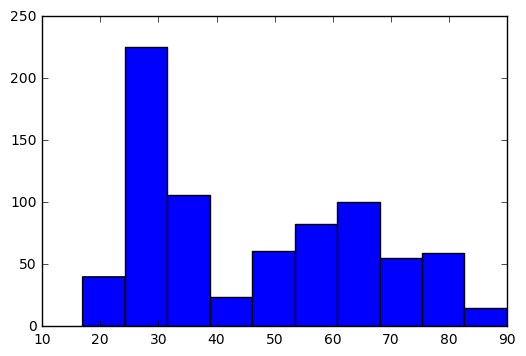

In [442]:
# Analyzing the Load distribution
import matplotlib.pyplot as plt
plt.hist(Y)
plt.show()

In [443]:
# We can see from the plot above that most load lies in 20-30 range which is of low efficient category.Average and high 
# efficient load almost have same distribution.

#categorize the model label as 1 being low efficient ,2 being Average efficient  and 3 being High efficient.

for i in range(0,768):
    if (Y[i]>=16.95 and Y[i]<=40):
        Y[i]=1
    elif (Y[i]>=40.01 and Y[i]<=58):
        Y[i]=2
    else:
        Y[i]=3

In [444]:
# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# convert integers to dummy variables (i.e. one hot encoded)
dummy_y = np_utils.to_categorical(encoded_Y)

In [445]:
dummy_y

array([[ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.],
       [ 1.,  0.,  0.]])

In [446]:
# Test and Train Split
from sklearn.model_selection import train_test_split
Y_train,Y_test = train_test_split(dummy_y,test_size = 0.2,random_state = 1)

In [447]:
# create model
model = Sequential()
model.add(Dense(15, input_dim=8, activation='relu'))
model.add(Dense(12, activation='relu'))

model.add(Dense(3, activation='sigmoid'))

In [448]:
# Compile model
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [449]:
# Fit the model
model.fit(X_train, Y_train, epochs=450, batch_size=10)

Epoch 1/450
614/614 [==============================] - 2s 3ms/step - loss: 1.0845 - acc: 0.2883
Epoch 2/450
614/614 [==============================] - 0s 219us/step - loss: 0.9410 - acc: 0.8274
Epoch 3/450
614/614 [==============================] - 0s 221us/step - loss: 0.7741 - acc: 0.8453
Epoch 4/450
614/614 [==============================] - 0s 215us/step - loss: 0.6072 - acc: 0.8453
Epoch 5/450
614/614 [==============================] - 0s 220us/step - loss: 0.4841 - acc: 0.8453
Epoch 6/450
614/614 [==============================] - 0s 214us/step - loss: 0.4209 - acc: 0.8453
Epoch 7/450
614/614 [==============================] - 0s 224us/step - loss: 0.3985 - acc: 0.8453
Epoch 8/450
614/614 [==============================] - 0s 224us/step - loss: 0.3905 - acc: 0.8453
Epoch 9/450
614/614 [==============================] - 0s 222us/step - loss: 0.3835 - acc: 0.8453
Epoch 10/450
614/614 [==============================] - 0s 209us/step - loss: 0.3769 - acc: 0.8453
Epoch 11/450
614/614 

In [450]:
# evaluate the model
scores = model.evaluate(X_test, Y_test)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

154/154 [==============================] - 1s 3ms/step

acc: 96.75%


In [434]:
# Pridict the model
y_predict = model.predict(X_test)
y_predict

array([[ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.,  1.],
       [ 1.,  1.